# Traitements statistiques
__Durée : 1h30__

Pandas et Matplotlib, puis aller vers des tests et des modèles

In [1]:
#Charger les librairies
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Charger le corpus mis en forme précédemment

In [2]:
corpus = pd.read_excel("../Données/corpus.xlsx")

In [6]:
corpus[0:3]

,Date_reco,Date,Titre,Journal,Contenu,Nombre de mots,freq-homeo,freq-alterna,freq-allopath,freq-nofakemed,Journal-reco,Annee
0,2018-05-23,"Science & Médecine, mercredi 23 mai 2018 246...",Homéopathie Une réglementation à haute diluti...,Le Monde,(Lyon; correspondant); - Quand on lui parle ...,2679,43,2,2,0,Le Monde,2018
1,2018-06-16,"Événement, samedi 16 juin 2018 1243 mots, p. 4",Principale «Réduire l'homéopathie à un effet ...,"Libération, no. 11524","Le regard, au-dessus des petites lunettes ce...",1341,26,0,12,0,Libération,2018
2,2018-04-10,"Sciences et éthique, mardi 10 avril 2018 105...",Faut-il en finir avec l'homéopathie? Une trib...,"La Croix, no. 41073",Faut-il se débarrasser de l'homéopathie? Voi...,1183,23,0,0,0,La Croix,2018


Comme présenté précédemment, il est facile de faire un traitement statistique sur chaque série

Possibiliter de traiter chaque colonne

In [24]:
corpus["Nombre de mots"].median()

495.5

Résumer l'information

In [23]:
corpus[corpus.columns[-5:]].describe()

,Nombre de mots,freq-homeo,freq-alterna,freq-allopath,freq-nofakemed
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,686.580000,7.580000,0.520000,0.340000,0.360000
std,681.502335,7.961873,0.886175,1.733346,1.625812
min,23.000000,1.000000,0.000000,0.000000,0.000000
25%,195.000000,2.000000,0.000000,0.000000,0.000000
50%,495.500000,4.500000,0.000000,0.000000,0.000000
75%,897.750000,11.000000,1.000000,0.000000,0.000000
max,3089.000000,43.000000,3.000000,12.000000,11.000000


Sauvegarder le résumé

In [26]:
corpus[corpus.columns[-5:]].agg(["mean","median","std"]).T.to_excel("stats.xlsx")

,mean,median,std
Nombre de mots,686.58,495.5,681.502335
freq-homeo,7.58,4.5,7.961873
freq-alterna,0.52,0.0,0.886175
freq-allopath,0.34,0.0,1.733346
freq-nofakemed,0.36,0.0,1.625812


## Visualiser
* Différentes visualisations
* Mettre un titre, légende ,couleur, taille
* Sauvegarder
* Plusieurs graphiques fig, ax_lst = plt.subplots(2, 2)

D'abord de l'exploratoire

Text(0, 0.5, "Nombre d'articles")

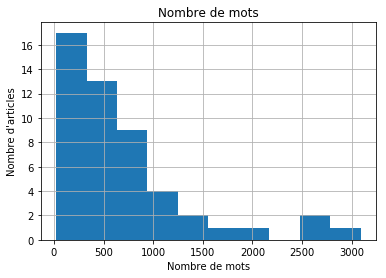

In [79]:
corpus["Nombre de mots"].hist()
plt.title("Nombre de mots")
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre d'articles")
#plt.grid(False)
#plt.savefig()


On peut changer la couleur, le découpage, etc puis sauver la figure

Voir l'évolution temporelle d'un des termes : fakemed

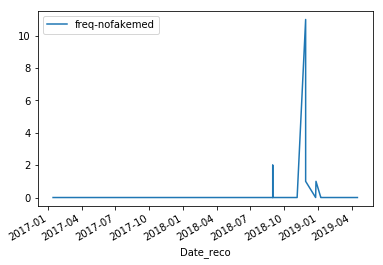

In [87]:
corpus[["Date_reco","freq-nofakemed"]].set_index("Date_reco").plot()

Text(0, 0.5, "Nombre d'occurence de homéopathie")

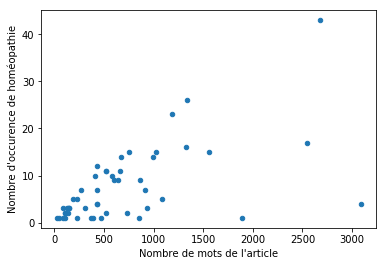

In [19]:
corpus.plot(kind="scatter", x="Nombre de mots",y="freq-homeo")
plt.xlabel("Nombre de mots de l'article")
plt.ylabel("Nombre d'occurence de homéopathie")

En dernier recours, toutes les visualisations sont possibles...  :https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

## Analyse bivariée

Une opération souvent nécessaire en sociologie est le tableau croisé : fonction pandas pd.crosstab

In [7]:
pd.crosstab(corpus["Journal-reco"],corpus["Annee"])

Annee,2017,2018,2019
Journal-reco,,,
La Croix,2,11,2
Le Monde,3,21,1
Libération,1,6,3


Avec une lecture en pourcentage par colonne : on applique une fonction

In [8]:
pd.crosstab(corpus["Journal-reco"],corpus["Annee"]).apply(lambda x : 100*x/sum(x))

Annee,2017,2018,2019
Journal-reco,,,
La Croix,33.333333,28.947368,33.333333
Le Monde,50.000000,55.263158,16.666667
Libération,16.666667,15.789474,50.000000


Se poser la question des régularités observés : par exemple, est-ce qu'il y a une corrélation ?

In [28]:
corpus[corpus.columns[-5:]].corr()

,Nombre de mots,freq-homeo,freq-alterna,freq-allopath,freq-nofakemed
Nombre de mots,1.000000,0.584875,0.454909,0.209720,0.456046
freq-homeo,0.584875,1.000000,0.268768,0.437926,0.166425
freq-alterna,0.454909,0.268768,1.000000,-0.037733,0.434013
freq-allopath,0.209720,0.437926,-0.037733,1.000000,-0.044320
freq-nofakemed,0.456046,0.166425,0.434013,-0.044320,1.000000


### Aller plus loin : faire des tests statistiques

Faire un test de khi2 sur le tableau : on utilise la librairie scipy

In [11]:
from scipy.stats import chi2_contingency

In [9]:
tableau = pd.crosstab(corpus["Journal-reco"],corpus["Annee"])

In [12]:
p = chi2_contingency(tableau)
p[1]

0.3225788433434356

Ce n'est pas significatif

Faire une ANOVA, par exemple pour se demander si la taille des articles varie entre les journaux

Pour plus d'info : https://pythonfordatascience.org/anova-python/

In [103]:
corpus.groupby("Journal-reco")["Nombre de mots"].describe()

,count,mean,std,min,25%,50%,75%,max
Journal-reco,,,,,,,,
La Croix,15.0,375.933333,298.828060,23.0,148.50,368.0,479.50,1183.0
Le Monde,25.0,819.640000,839.802253,43.0,152.00,600.0,937.00,3089.0
Libération,10.0,819.900000,528.450239,145.0,454.75,793.5,1015.25,1888.0


In [104]:
from scipy.stats import f_oneway

In [106]:
f_oneway(corpus[corpus["Journal-reco"]=="Le Monde"]["Nombre de mots"],
        corpus[corpus["Journal-reco"]=="La Croix"]["Nombre de mots"],
        corpus[corpus["Journal-reco"]=="Libération"]["Nombre de mots"])

F_onewayResult(statistic=2.348742226503404, pvalue=0.10660277164869987)

Il existe plusieurs façon de faire les tests, et de les paramétrer. Par exemple, une nouvelle librairie : 
https://researchpy.readthedocs.io

## Aller vers des modèles

Faire une régression linéaire : http://pythonfordatascience.org/linear-regression-python/

Text(0, 0.5, "Nombre d'occurence de homéopathie")

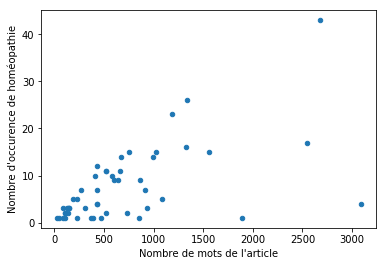

In [13]:
ax = corpus.plot(kind="scatter", x="Nombre de mots",y="freq-homeo")
plt.xlabel("Nombre de mots de l'article")
plt.ylabel("Nombre d'occurence de homéopathie")

Librairie de modèles

In [14]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip

Initier un modèle

In [19]:
#Les espaces et les tirets ne sont pas reconnus par la librairie de modèles
corpus["nm"] = corpus["Nombre de mots"]
corpus["fh"] = corpus["freq-homeo"]

model = smf.ols("fh ~ nm", data= corpus).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     fh   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     24.96
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           8.18e-06
Time:                        18:04:01   Log-Likelihood:                -163.71
No. Observations:                  50   AIC:                             331.4
Df Residuals:                      48   BIC:                             335.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8886      1.317      2.194      0.033       0.241       5.536
nm             0.0068      0.001      4.996      0.000       0.004       0.010
==============================================================================
Omnibus:                        9.586   Durbin-Watson:                   0.649
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               20.761
Skew:                           0.265   Prob(JB):                     3.10e-05
Kurtosis:                       6.112   Cond. No.                     1.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""